<h1> <b> Lab - 1 </b> </h1>
<h2> Exercise on NLTK </h2>

In [43]:
import nltk # Python library for NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # library for visualization
import random

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br/>
<h5> I have created my own dataset named as <b>sentence dataset</b></h5>

*   <h5> Column 'Sentences' is used to store the sentences. </h5>
*   <h5> Column 'Target' is used to indicate whether the sentence is good, bad, or neutral. </h5>


*   <h5> Target = 0 ---> Good </h5>
*   <h5> Target = 1 ---> Bad </h5>
*   <h5> Target = 2 ---> Neutral </h5>

<br/>

In [47]:
# read csv file for processing

df = pd.read_csv("/content/drive/MyDrive/ML LAB/Sentence_Dataset.csv")
df.head() # it prints first 5 rows


,Sentences,Target
0,"They got there early, and they got really good...",0
1,"I am counting my calories, yet I really want d...",1
2,Lightning Paradise was the local hangout joint...,2
3,Be careful with that butter knife.,1
4,Tomatoes make great weapons when water balloon...,0


In [48]:
# fetching data
x = df['Sentences']
y = df['Target']

# finding the occurence of all types of targets.
value = y.value_counts()
display(value)

0    4
1    3
2    2
Name: Target, dtype: int64

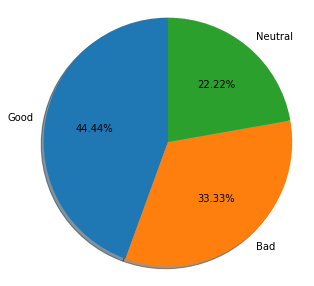

In [49]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the classes
labels = 'Good', 'Bad','Neutral'

plt.pie(value, labels=labels, autopct='%.2f%%',shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

<br/>
<h2> <b> Stopwords and Tokenization </b></h2>
<br/>

In [50]:
# Downloading NLTK stopwords for removing stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
import re # library for regular expression operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

In [ ]:
# Taking 3rd row for processing of stopwords and tokenization

sentence = df['Sentences'].iloc[2:3].to_list()
display(sentence)

['Lightning Paradise was the local hangout joint where the group usually ended up spending the night.']

In [52]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)

# tokenize sentences
tokenize_text = tokenizer.tokenize(sentence[0])
display(tokenize_text)


['lightning',
 'paradise',
 'was',
 'the',
 'local',
 'hangout',
 'joint',
 'where',
 'the',
 'group',
 'usually',
 'ended',
 'up',
 'spending',
 'the',
 'night',
 '.']

In [53]:
# Removing stopwords form sentences
stopwords_english = stopwords.words('english')

print("Stopwords: \n")
print(stopwords_english)

Stopwords: 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [54]:
# removing stop words
sentence_clean = []
for i in tokenize_text:
  if i not in stopwords_english and i not in string.punctuation:
    sentence_clean.append(i)
print("Tokenized Text: ",tokenize_text)
print("\nCleaned Sentence: ",sentence_clean)

Tokenized Text:  ['lightning', 'paradise', 'was', 'the', 'local', 'hangout', 'joint', 'where', 'the', 'group', 'usually', 'ended', 'up', 'spending', 'the', 'night', '.']

Cleaned Sentence:  ['lightning', 'paradise', 'local', 'hangout', 'joint', 'group', 'usually', 'ended', 'spending', 'night']


<br/>
<h2> <b> Stemming </b></h2>
<br/>

In [55]:
# Instantiate stemming class
stemmer = PorterStemmer()

sentence_stem = []

for word in sentence_clean:
  stem_word = stemmer.stem(word)
  sentence_stem.append(stem_word)

print("\nCleaned Sentence: ",sentence_clean)
print("\nStemmed words: ",sentence_stem)


Cleaned Sentence:  ['lightning', 'paradise', 'local', 'hangout', 'joint', 'group', 'usually', 'ended', 'spending', 'night']

Stemmed words:  ['lightn', 'paradis', 'local', 'hangout', 'joint', 'group', 'usual', 'end', 'spend', 'night']
